In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt  


# Data Preparation

In [2]:
df_train = pd.read_csv('trainset.csv') 
df_test = pd.read_csv('testset.csv')

In [3]:
columns_to_remove = ['endYear','awardWins', 'worstRating', 'bestRating', 'totalCredits', 'awardNominationsExcludeWins', 'externalLinks'
                    , 'isRatable']

# Loại bỏ các cột khỏi dataset 'trainset'
df_train= df_train.drop(columns=columns_to_remove)
# Loại bỏ các cột khỏi dataset 'testset'
df_test = df_test.drop(columns=columns_to_remove)

In [4]:
df_train.dtypes

rating                 object
startYear               int64
runtimeMinutes        float64
totalImages             int64
totalVideos             int64
criticReviewsTotal      int64
titleType             float64
canHaveEpisodes         int64
isAdult                 int64
numRegions              int64
userReviewsTotal        int64
ratingCount             int64
genres                float64
castNumber              int64
companiesNumber         int64
regions               float64
writerCredits           int64
directorsCredits        int64
soundMixes            float64
quotesTotal             int64
continent             float64
ratewinningawards     float64
dtype: object

In [5]:
my_dict = {
    '0 - 4': 0,
    '4 - 6': 1,
    '6 - 7': 2,
    '7 - 8': 3,
    '8 - 9': 4,
    '9 - 10': 5
}
df_train['rating'] = df_train['rating'].map(my_dict)
df_test['rating'] = df_test['rating'].map(my_dict)


In [6]:
X_train = df_train.drop(columns=["rating"])
y_train = df_train["rating"]
X_test = df_test.drop(columns=["rating"])
y_test = df_test["rating"]

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)

# Fit on training data, then transform both train and test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
df_train

,rating,startYear,runtimeMinutes,totalImages,totalVideos,criticReviewsTotal,titleType,canHaveEpisodes,isAdult,numRegions,...,genres,castNumber,companiesNumber,regions,writerCredits,directorsCredits,soundMixes,quotesTotal,continent,ratewinningawards
0,4,1972,30.0,0,0,0,0.478478,0,0,0,...,0.000507,5,2,0.235246,1,1,0.361396,0,0.629360,0.0
1,4,1979,92.0,1,0,0,0.242935,0,0,1,...,0.005926,17,2,0.002054,1,1,0.361396,0,0.096216,0.4
2,5,2018,20.0,3,0,8,0.478478,0,0,0,...,0.005291,5,2,0.235246,2,2,0.553848,0,0.629360,0.0
3,3,2012,30.0,0,0,0,0.478478,0,0,0,...,0.000311,1,4,0.235246,0,0,0.553848,0,0.629360,0.0
4,4,2005,30.0,1,0,0,0.478478,0,0,0,...,0.013386,15,2,0.235246,1,1,0.553848,0,0.629360,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103588,4,1992,30.0,0,0,0,0.478478,0,0,7,...,0.001676,24,0,0.054781,1,1,0.553848,0,0.629360,0.0
103589,3,2012,112.0,2,0,4,0.242935,0,0,2,...,0.000845,12,4,0.000081,1,1,0.000088,0,0.096216,1.0
103590,3,1963,75.0,10,0,1,0.478478,0,0,1,...,0.011663,13,3,0.211758,1,1,0.361396,20,0.629360,0.0
103591,3,1967,3.0,0,0,0,0.110643,0,0,1,...,0.015224,2,2,0.211758,0,0,0.361396,0,0.629360,0.0


# Data Partitioning

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Classification

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [12]:
df_train['rating'].value_counts()

rating
3    33600
2    26986
1    21089
4    15325
0     3606
5     2987
Name: count, dtype: int64

In [13]:
df_test['rating'].value_counts()

rating
3    14400
2    11565
1     9039
4     6568
0     1545
5     1280
Name: count, dtype: int64

In [14]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.39056693019798633
F1-score [0.18071559 0.42203193 0.35943045 0.46972911 0.30497774 0.2010582 ]
              precision    recall  f1-score   support

           0      0.170     0.193     0.181      1545
           1      0.404     0.442     0.422      9039
           2      0.356     0.363     0.359     11565
           3      0.470     0.469     0.470     14400
           4      0.326     0.287     0.305      6568
           5      0.262     0.163     0.201      1280

    accuracy                          0.391     44397
   macro avg      0.331     0.320     0.323     44397
weighted avg      0.389     0.391     0.389     44397



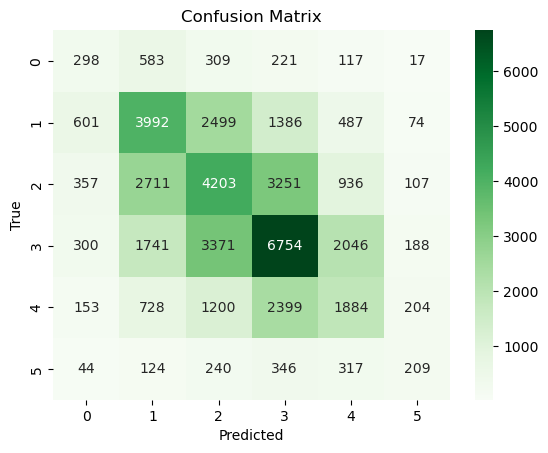

In [15]:


cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, cmap="Greens", fmt='d')  # fmt='d' to show integer values
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Feature Importance

In [16]:
feature_names = df_train.drop(columns='rating').columns
importances = pd.Series(clf.feature_importances_, index=feature_names)
important_features = importances.sort_values(ascending=False)

# To print all
for col, imp in important_features.items():
    print(f"{col}: {imp:.5f}")

ratingCount: 0.14693
startYear: 0.12642
castNumber: 0.11003
genres: 0.10128
runtimeMinutes: 0.08348
titleType: 0.07055
companiesNumber: 0.06532
totalImages: 0.05535
writerCredits: 0.04627
regions: 0.04604
userReviewsTotal: 0.02886
continent: 0.02112
numRegions: 0.02098
soundMixes: 0.01699
criticReviewsTotal: 0.01639
directorsCredits: 0.01571
quotesTotal: 0.01127
ratewinningawards: 0.01062
totalVideos: 0.00381
canHaveEpisodes: 0.00152
isAdult: 0.00105


# Feature Selection

## Variance Threshold

In [17]:
np.histogram(np.var(X_train, axis=0)[np.var(X_train, axis=0) < 3.14e04])

(array([1, 0, 3, 0, 0, 3, 0, 7, 0, 7], dtype=int64),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

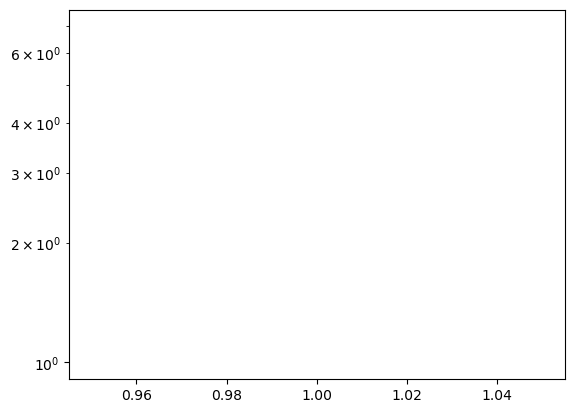

In [21]:
plt.hist(np.var(X_train, axis=0)[np.var(X_train, axis=0) < 3.14])
plt.yscale('log')
plt.show()


-> remove featurres that have variance < 0.9

In [22]:
from sklearn.feature_selection import VarianceThreshold

In [23]:
sel = VarianceThreshold(threshold=(.90 ))
X_train_sel = sel.fit_transform(X_train)

X_train_sel.shape

(103593, 21)

In [24]:
X_train.shape

(103593, 21)

In [25]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.39056693019798633
F1-score [0.18071559 0.42203193 0.35943045 0.46972911 0.30497774 0.2010582 ]
              precision    recall  f1-score   support

           0      0.170     0.193     0.181      1545
           1      0.404     0.442     0.422      9039
           2      0.356     0.363     0.359     11565
           3      0.470     0.469     0.470     14400
           4      0.326     0.287     0.305      6568
           5      0.262     0.163     0.201      1280

    accuracy                          0.391     44397
   macro avg      0.331     0.320     0.323     44397
weighted avg      0.389     0.391     0.389     44397



## Univariate Feature Selection

In [26]:
from sklearn.feature_selection import SelectKBest

In [27]:
sel = SelectKBest(k=22)
X_train_sel = sel.fit_transform(X_train, y_train)

X_train_sel.shape

C:\Users\manht\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:783: UserWarning: k=22 is greater than n_features=21. All the features will be returned.
  warnings.warn(


(103593, 21)

In [28]:
sel.scores_

array([1229.74331888,  920.26231359,    3.63337034,    6.69373772,
        233.05583045, 1868.85986749,   41.65421438,  137.25116193,
        757.5822209 ,  123.35386389,    4.07216216,    3.63804922,
         23.02215944,   28.41182747, 1617.9129948 ,  145.73568181,
         14.70579754,  864.90814499,   79.53407822,  422.96281403,
         60.81980364])

In [29]:

# Get the scores and selected features
scores = sel.scores_
top_features = feature_names[sel.get_support()]
top_scores = scores[sel.get_support()]

# Combine into a DataFrame
df_scores = pd.DataFrame({
    'Feature': top_features,
    'Score': top_scores
})

df_sorted = df_scores.sort_values('Score', ascending=False)

# Print sorted features and their scores
for _, row in df_sorted.iterrows():
    print(f"{row['Feature']}: {row['Score']:.2f}")


titleType: 1868.86
regions: 1617.91
startYear: 1229.74
runtimeMinutes: 920.26
soundMixes: 864.91
numRegions: 757.58
continent: 422.96
criticReviewsTotal: 233.06
writerCredits: 145.74
isAdult: 137.25
userReviewsTotal: 123.35
quotesTotal: 79.53
ratewinningawards: 60.82
canHaveEpisodes: 41.65
companiesNumber: 28.41
castNumber: 23.02
directorsCredits: 14.71
totalVideos: 6.69
ratingCount: 4.07
genres: 3.64
totalImages: 3.63


remove 8 features with ANOVA Fscore below 60

Univariate → evaluates each feature independently

Measures linear separation between class means

Sensitive to variance within and between classes

Does not consider feature interactions at all

🧨 So, if ratingCount has noisy or non-linear patterns, ANOVA won’t capture its real value



In [31]:
sel = SelectKBest(k=13)
X_train_sel = sel.fit_transform(X_train, y_train)

X_train_sel.shape

(103593, 13)

In [32]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.3757686330157443
F1-score [0.17092457 0.41235049 0.34057281 0.46560637 0.24165851 0.13850416]
              precision    recall  f1-score   support

           0      0.161     0.182     0.171      1545
           1      0.394     0.433     0.412      9039
           2      0.341     0.340     0.341     11565
           3      0.443     0.491     0.466     14400
           4      0.291     0.207     0.242      6568
           5      0.238     0.098     0.139      1280

    accuracy                          0.376     44397
   macro avg      0.311     0.292     0.295     44397
weighted avg      0.368     0.376     0.369     44397



## Recursive Feature Elimination (RFE)

In [33]:
from sklearn.feature_selection import RFE

In [34]:
sel = RFE(DecisionTreeClassifier(min_samples_leaf=3, random_state=42), n_features_to_select=16)
X_train_sel = sel.fit_transform(X_train, y_train)
X_train_sel.shape

(103593, 16)

In [35]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.3889451989999324
F1-score [0.16935003 0.42335079 0.35843889 0.4659433  0.3038262  0.21587609]
              precision    recall  f1-score   support

           0      0.157     0.184     0.169      1545
           1      0.402     0.447     0.423      9039
           2      0.355     0.362     0.358     11565
           3      0.470     0.462     0.466     14400
           4      0.325     0.285     0.304      6568
           5      0.284     0.174     0.216      1280

    accuracy                          0.389     44397
   macro avg      0.332     0.319     0.323     44397
weighted avg      0.388     0.389     0.388     44397



## Select Form Model
Meta-transformer for selecting features based on importance weights.

In [36]:
from sklearn.feature_selection import SelectFromModel

thresholdstr or float, default=None
The threshold value to use for feature selection. Features whose absolute importance value is greater or equal are kept while the others are discarded. If “median” (resp. “mean”), then the threshold value is the median (resp. the mean) of the feature importances. A scaling factor (e.g., “1.25*mean”) may also be used. If None and if the estimator has a parameter penalty set to l1, either explicitly or implicitly (e.g, Lasso), the threshold used is 1e-5. Otherwise, “mean” is used by defaul

In [37]:
sel = SelectFromModel(DecisionTreeClassifier(min_samples_leaf=3, random_state=42))
X_train_sel = sel.fit_transform(X_train, y_train)
X_train_sel.shape

(103593, 8)

In [38]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.3824582742077167
F1-score [0.1568056  0.41060924 0.35414717 0.46469968 0.29432914 0.21187648]
              precision    recall  f1-score   support

           0      0.143     0.174     0.157      1545
           1      0.391     0.432     0.411      9039
           2      0.349     0.360     0.354     11565
           3      0.470     0.459     0.465     14400
           4      0.318     0.274     0.294      6568
           5      0.270     0.174     0.212      1280

    accuracy                          0.382     44397
   macro avg      0.323     0.312     0.315     44397
weighted avg      0.383     0.382     0.382     44397



# Feature Projection

## Principal Component Analysis

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [41]:
X_train_pca.shape

(103593, 2)

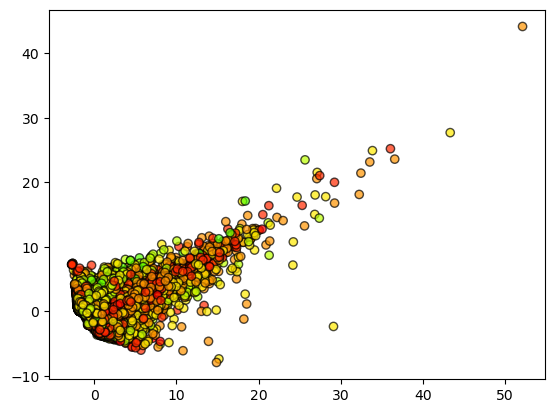

In [42]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, 
            cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [43]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.303669166835597
F1-score [0.10130246 0.31401336 0.29292759 0.38920825 0.18862174 0.13121925]
              precision    recall  f1-score   support

           0       0.09      0.11      0.10      1545
           1       0.29      0.34      0.31      9039
           2       0.29      0.30      0.29     11565
           3       0.40      0.38      0.39     14400
           4       0.21      0.17      0.19      6568
           5       0.22      0.09      0.13      1280

    accuracy                           0.30     44397
   macro avg       0.25      0.23      0.24     44397
weighted avg       0.30      0.30      0.30     44397



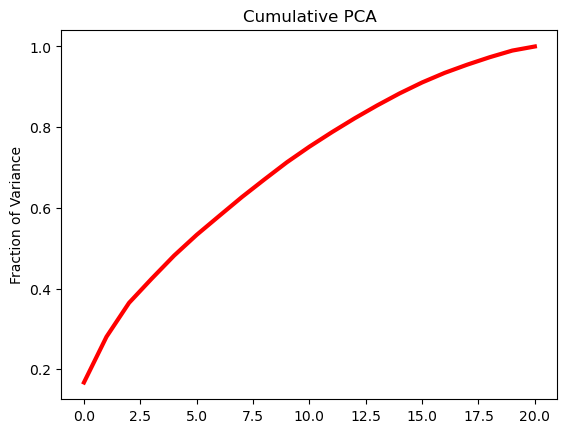

In [45]:
plt.plot(np.cumsum(PCA(n_components=21).fit(X_train).explained_variance_ratio_), lw=3, color='r', ms=2)
plt.title("Cumulative PCA")
plt.ylabel("Fraction of Variance")
plt.show()

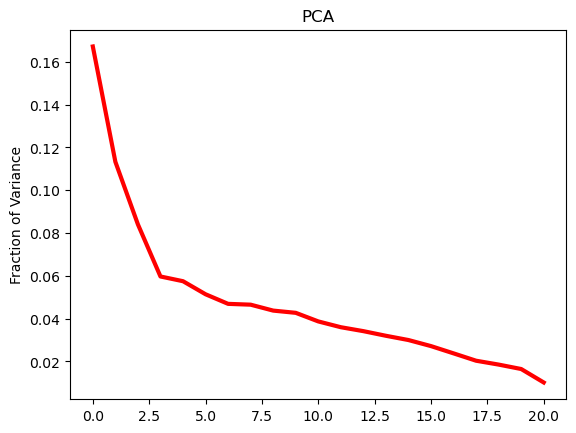

In [46]:
plt.plot(PCA(n_components=21).fit(X_train).explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.show()

In [47]:
# Áp dụng với n = 18
pca = PCA(n_components=18)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [48]:
X_train_pca.shape

(103593, 18)

In [49]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.36351555285267023
F1-score [0.14599373 0.39334182 0.33745945 0.44420216 0.27518664 0.18147268]
              precision    recall  f1-score   support

           0       0.13      0.17      0.15      1545
           1       0.38      0.41      0.39      9039
           2       0.33      0.34      0.34     11565
           3       0.45      0.44      0.44     14400
           4       0.29      0.26      0.28      6568
           5       0.23      0.15      0.18      1280

    accuracy                           0.36     44397
   macro avg       0.30      0.29      0.30     44397
weighted avg       0.36      0.36      0.36     44397



# Random Subspace Projection

In [50]:
from sklearn import random_projection

For visualization only

In [51]:
rsp = random_projection.GaussianRandomProjection(n_components=2, random_state=None)
X_train_rsp = rsp.fit_transform(X_train)
X_train_rsp.shape

(103593, 2)

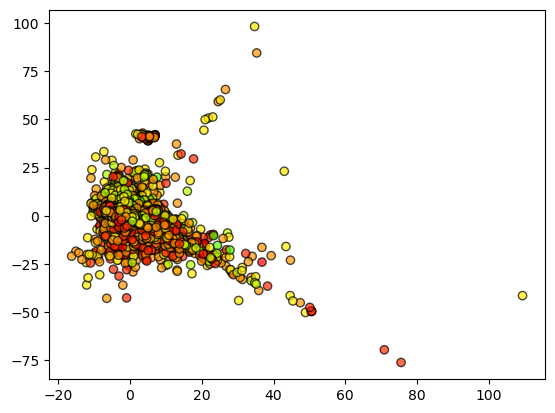

In [52]:
plt.scatter(X_train_rsp[:, 0], X_train_rsp[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [54]:
rsp = random_projection.GaussianRandomProjection(n_components=21, random_state=None)
X_train_rsp = rsp.fit_transform(X_train)
X_train_rsp.shape

(103593, 21)

In [55]:
X_test_rsp = rsp.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_rsp, y_train)

y_pred = clf.predict(X_test_rsp)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.35750163299322024
F1-score [0.15560641 0.37577672 0.33624324 0.43767391 0.27257323 0.17834395]
              precision    recall  f1-score   support

           0       0.14      0.18      0.16      1545
           1       0.36      0.39      0.38      9039
           2       0.33      0.34      0.34     11565
           3       0.44      0.43      0.44     14400
           4       0.29      0.26      0.27      6568
           5       0.24      0.14      0.18      1280

    accuracy                           0.36     44397
   macro avg       0.30      0.29      0.29     44397
weighted avg       0.36      0.36      0.36     44397



## Multi Dimensional Scaling

In [44]:
from sklearn.manifold import MDS

In [45]:
# mds = MDS(n_components=2) #, normalized_stress='auto') # shoudl run as sammon mapping
# X_train_mds = mds.fit_transform(X_train)
# X_train_mds.shape

In [46]:
# #X_test_mds = mds.transform(X_test) # no transform

# clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
# clf.fit(X_train_mds, y_train)

# y_pred = clf.predict(X_train_mds)

# print('Accuracy %s' % accuracy_score(y_train, y_pred))
# print('F1-score %s' % f1_score(y_train, y_pred, average=None))
# print(classification_report(y_train, y_pred))

## IsoMap

In [47]:
from sklearn.manifold import Isomap

In [48]:
# iso = Isomap(n_components=20)
# X_train_iso = iso.fit_transform(X_train)
# X_train_iso.shape

In [49]:
# #X_test_mds = mds.transform(X_test) # no transform

# clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
# clf.fit(X_train_iso, y_train)

# y_pred = clf.predict(X_train_iso)

# print('Accuracy %s' % accuracy_score(y_train, y_pred))
# print('F1-score %s' % f1_score(y_train, y_pred, average=None))
# print(classification_report(y_train, y_pred))

## t-SNE

In [56]:
from sklearn.manifold import TSNE

In [57]:
import plotly.express as px
import plotly.io as pio

t-SNE is computationally expensive

Perplexity is an important hyperparameter for the t-SNE algorithm. It controls the effective number of neighbors that each point considers during the dimensionality reduction process. 

We will run a loop to get the KL Divergence metric on various perplexities from 20 to 50 with a 10-point gap. Then, we will display the result using the Plotly Express line plot

In [52]:
# perplexity = np.arange(20, 50, 10)
# divergence = []

# for i in perplexity:
#     model = TSNE(n_components=2, init="pca", perplexity=i)
#     reduced = model.fit_transform(X_train)
#     divergence.append(model.kl_divergence_)
# fig = px.line(x=perplexity, y=divergence, markers=True)
# fig.update_layout(xaxis_title="Perplexity Values", yaxis_title="Divergence")
# fig.update_traces(line_color="red", line_width=1)
# fig.show()

In [58]:
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne.shape

C:\Users\manht\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\manht\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
  

(103593, 2)

In [54]:
tsne.kl_divergence_

1.6827166080474854

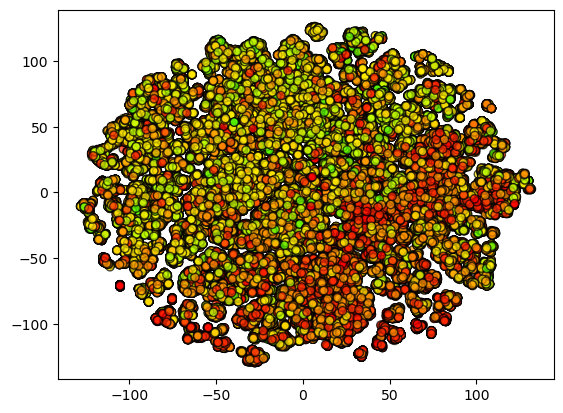

In [55]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [59]:
#X_test_mds = mds.transform(X_test) # no transform

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_tsne, y_train)

y_pred = clf.predict(X_train_tsne)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

Accuracy 0.7351848097844449
F1-score [0.56559328 0.74574996 0.73748842 0.78767834 0.67427341 0.50772915]
              precision    recall  f1-score   support

           0       0.52      0.63      0.57      3606
           1       0.70      0.80      0.75     21089
           2       0.72      0.75      0.74     26986
           3       0.80      0.78      0.79     33600
           4       0.75      0.61      0.67     15325
           5       0.73      0.39      0.51      2987

    accuracy                           0.74    103593
   macro avg       0.70      0.66      0.67    103593
weighted avg       0.74      0.74      0.73    103593



## Sammon Mapping

In [57]:
# !pip install sammon-mapping

In [58]:
from sammon.sammon import sammon

In [59]:
X_train_sammon, stress = sammon(X_train, n = 2)
X_train_sammon.shape

MemoryError: Unable to allocate 80.1 GiB for an array with shape (103677, 103677) and data type float64

The function returns:
* y: array-like, shape (n_samples, n_components) The transformed output data.
* stress: float The final value of the stress function.